# Fandango Descriptive Statistics

## Import the Data

The Data comes from FiveThirtyEight Fandango Score Comparison CSV

In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
movie_reviews = pd.read_csv('fandango_score_comparison.csv')
#Check what the data looks like:
movie_reviews.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


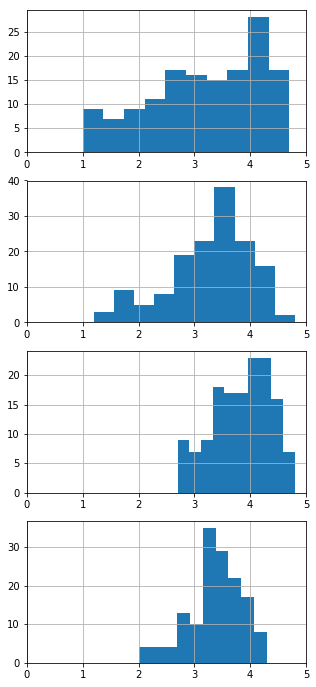

In [13]:
fig = plt.figure(figsize = (5,12))

ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)
ax4.set_xlim(0,5.0)

movie_reviews["RT_user_norm"].hist(ax=ax1)
movie_reviews["Metacritic_user_nom"].hist(ax=ax2)
movie_reviews["Fandango_Ratingvalue"].hist(ax=ax3)
movie_reviews["IMDB_norm"].hist(ax=ax4)


In [38]:
def calc_mean(series):
    return sum(series)/len(series)

def calc_variance(series):
    mean = calc_mean(series)
    differences = series - mean
    square_differences = differences ** 2
    return sum(square_differences)/len(square_differences)

def calc_covariance(series_one, series_two):
    x = series_one
    y = series_two
    mu_x = calc_mean(x)
    mu_y = calc_mean(y)
    x_diffs = x - mu_x
    y_diffs = y - mu_y
    n = len(x)
    return sum(x_diffs * y_diffs) / n

def calc_correlation(series_one, series_two):
    x = series_one
    y = series_two
    x_stdev = calc_variance(x) ** (1/2)
    y_stdev = calc_variance(y) ** (1/2)
    return calc_covariance(x, y) / (x_stdev * y_stdev)

In [30]:
user_reviews = movie_reviews[['RT_user_norm','Metacritic_user_nom', 'Fandango_Ratingvalue','IMDB_norm']]
user_means = user_reviews.apply(calc_mean)
user_variances = user_reviews.apply(calc_variance)
user_stdevs = user_variances ** (1/2)

In [31]:
print(user_means)
print(user_stdevs)

RT_user_norm            3.193836
Metacritic_user_nom     3.259589
Fandango_Ratingvalue    3.845205
IMDB_norm               3.368493
dtype: float64
RT_user_norm            0.997787
Metacritic_user_nom     0.752765
Fandango_Ratingvalue    0.501106
IMDB_norm               0.477723
dtype: float64


## Visualizing Fandango Rating vs Other Ratings

Fandango Ratings seem to be generally higher and less variable than the other three rating systems. I want to check if highly rated movies on other platforms correlate with highly rated movies on Fandango

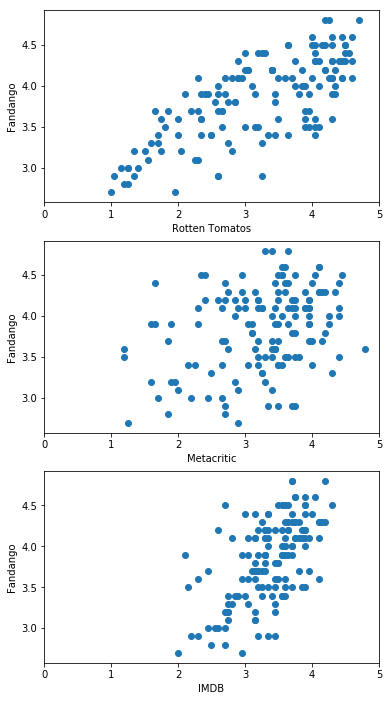

In [37]:
fig = plt.figure(figsize = (6,12))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)

ax1.scatter(movie_reviews['RT_user_norm'],movie_reviews['Fandango_Ratingvalue'])
ax2.scatter(movie_reviews['Metacritic_user_nom'], movie_reviews['Fandango_Ratingvalue'])
ax3.scatter(movie_reviews['IMDB_norm'], movie_reviews['Fandango_Ratingvalue'])

ax1.set_xlabel('Rotten Tomatos')
ax2.set_xlabel('Metacritic')
ax3.set_xlabel('IMDB')

ax1.set_ylabel('Fandango')
ax2.set_ylabel('Fandango')
ax3.set_ylabel('Fandango')
plt.show()

Looking at the scatter plots above. It seems that Fandango scores have decent correlation with Rotten Tomatos and IMDB, but poor correlation to Metacritic User Scores

In [39]:
rt_fg_covar = calc_covariance(movie_reviews['RT_user_norm'], movie_reviews['Fandango_Ratingvalue'])
mc_fg_covar = calc_covariance(movie_reviews['Metacritic_user_nom'], movie_reviews['Fandango_Ratingvalue'])
id_fg_covar = calc_covariance(movie_reviews['IMDB_norm'], movie_reviews['Fandango_Ratingvalue'])

In [40]:
print(rt_fg_covar)
print(id_fg_covar)
print(mc_fg_covar)

0.3621622255582659
0.1437188027772567
0.1271007693751173
